In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats.mstats import winsorize

In [21]:
df = pd.read_csv("../data/laptop_prices.csv")

In [22]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [23]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 

In [24]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object


In [25]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [26]:
# Mostrar valores nulos de cada columna
print("Conteo de valores nulos por columna:")
df.isnull().sum()

Conteo de valores nulos por columna:


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

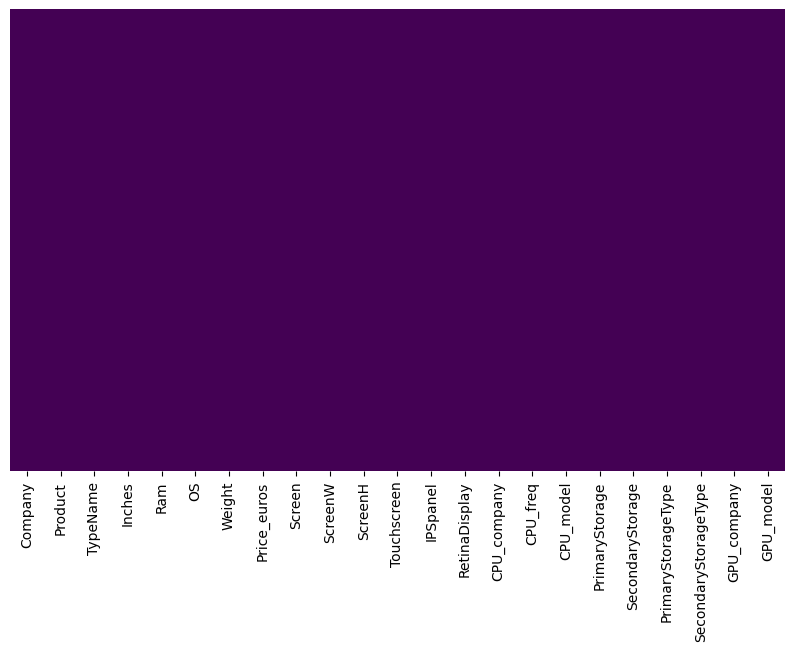

In [27]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [28]:
# Detectar valores atípicos en el precio de las laptops

Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Price_euros'] < lower_limit) | (df['Price_euros'] > upper_limit)]
outliers

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
17,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2858.00,Standard,2880,...,Yes,Intel,2.9,Core i7,512,0,SSD,No,AMD,Radeon Pro 560
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,6099.00,4K Ultra HD,3840,...,No,Intel,2.9,Core i7 7820HK,1024,0,SSD,No,Nvidia,GeForce GTX 1080
204,Dell,Precision 7520,Workstation,15.6,16,Windows 10,2.80,3055.00,4K Ultra HD,3840,...,No,Intel,3.0,Xeon E3-1505M V6,256,1024,SSD,HDD,Nvidia,Quadro M1200
238,Asus,ROG G703VI-E5062T,Gaming,17.3,32,Windows 10,4.70,3890.00,Full HD,1920,...,No,Intel,2.9,Core i7 7820HK,512,1024,SSD,HDD,Nvidia,GeForce GTX 1080
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,16,Windows 10,3.60,2999.00,Full HD,1920,...,No,Intel,2.9,Core i7 7820HK,256,0,SSD,No,Nvidia,GeForce GTX 1080
297,Dell,Precision 7720,Workstation,17.3,16,Windows 10,3.42,2884.86,Full HD,1920,...,No,Intel,2.9,Core i7 7820HQ,256,0,SSD,No,Nvidia,Quadro M1200
517,Asus,ROG Zephyrus,Gaming,15.6,24,Windows 10,2.24,2968.00,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,512,0,SSD,No,Nvidia,GeForce GTX1080
530,Dell,Alienware 17,Gaming,17.3,16,Windows 10,4.42,3012.77,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,128,1024,SSD,HDD,Nvidia,GeForce GTX 1070
563,Lenovo,Thinkpad P71,Notebook,17.3,8,Windows 10,3.40,2999.00,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,256,0,SSD,No,Nvidia,Quadro M620M
610,Lenovo,Thinkpad P51,Notebook,15.6,32,Windows 10,2.50,4899.00,4K Ultra HD,3840,...,No,Intel,3.1,Xeon E3-1535M v6,1024,0,SSD,No,Nvidia,Quadro M2200M


In [29]:
# Imputación de valores faltantes

# Identificar columnas numéricas y categóricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Imputar valores faltantes en columnas numéricas con la media
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Imputar valores faltantes en columnas categóricas con la moda
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Eliminar columnas irrelevantes para el modelo
df.drop(columns=['Product', 'CPU_model', 'GPU_model'], inplace=True)

# Transformar variables categoricas en variables dummy
df = pd.get_dummies(df, drop_first=True)

df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,True,...,False,False,False,False,False,True,False,False,True,False
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,False,...,False,False,False,True,False,True,False,False,True,False
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,True,...,False,False,False,True,False,True,False,False,False,False
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False


In [ ]:
# Guardar los datos preprocesados
df.to_csv("../data/laptop_prices_preprocessed.csv", index=False)
print("Datos preprocesados guardados en 'laptop_prices_preprocessed.csv'")

Datos preprocesados guardados en 'laptop_prices_preprocessed.csv'
